In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import altair as alt

In [3]:
data = pd.read_csv('log_csv/20210603_strain_plot_MRvsNH.csv')
data.head()

,Unnamed: 0,-E,-nu,-mu_1,-K,-mu_2,-problem,-bc_clamp,-bc_clamp_1_rotate,-bc_clamp_2_rotate,-bc_clamp_3_rotate,-bc_clamp_4_rotate,-bc_clamp_5_rotate,-bc_clamp_6_rotate,Configure,Load,Strain,filename
0,0,2.8,0.4,1.0,4.667,0,FSInitial-NH1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0001850540540606, 0.0007402038749614, 0.001...",libCEED/strain_plot/20210602_FSInitial-NH1/log...
1,1,0.5,0.4,0.5,10.000,0,FSInitial-MR1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8.963585792095e-05, 0.000358541059542, 0.0008...",libCEED/strain_plot/MR/log.txt
2,2,0.5,0.4,0.5,10.000,0,FSInitial-NH1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3.828396436549e-05, 0.0001530158452229, 0.000...",libCEED/strain_plot/NH/log.txt
3,3,2.8,0.4,1.0,4.667,0,FSInitial-MR1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","PETSC_ARCH=libceed --download-{hdf5,netcdf,pne...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0001792710704439, 0.0007170717928345, 0.001...",libCEED/strain_plot/20210602_FSInitial-MR1/log...


In [5]:
x_MR = [int(x) for x in data['Load'][3].replace('[', '').replace(']', '').strip().split(', ')]
x_NH = [int(x) for x in data['Load'][0].replace('[', '').replace(']', '').strip().split(', ')]
print(x_MR)
print(x_NH)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [6]:
y_MR = [float(x) for x in data['Strain'][3].replace('[', '').replace(']', '').strip().split(', ')]
y_NH = [float(x) for x in data['Strain'][0].replace('[', '').replace(']', '').strip().split(', ')]
print(y_MR, y_NH)

[0.0001792710704439, 0.0007170717928345, 0.001613364700594, 0.00286808735025, 0.004481152322701, 0.006452447225043, 0.008781834693009, 0.01146915239409, 0.01451421303141, 0.01791680434848, 0.02167668913485, 0.02579360523285, 0.03026726554544, 0.03509735804541, 0.04028354578586, 0.04582546691221, 0.05172273467578, 0.05797493744907, 0.06458163874275, 0.07154237722455, 0.07885666674005, 0.08652399633538, 0.09454383028204, 0.1029156081036, 0.1116387446048, 0.1207126299021, 0.1301366294568, 0.1399100841104, 0.1500323101211, 0.160502599203, 0.1713202185669, 0.1824844109632, 0.1939943947264, 0.2058493638206, 0.2180484878885, 0.2305909122994, 0.2434757582009, 0.2567021225704, 0.2702690782684, 0.2841756740931, 0.2841756740931] [0.0001850540540606, 0.0007402038749614, 0.001665412440635, 0.002960618053566, 0.0046257343497, 0.006660650310986, 0.00906523028156, 0.01183931398767, 0.01498271656136, 0.0184952285681, 0.02237661603825, 0.0266266205027, 0.03124495903255, 0.03623132428311, 0.0415853845421

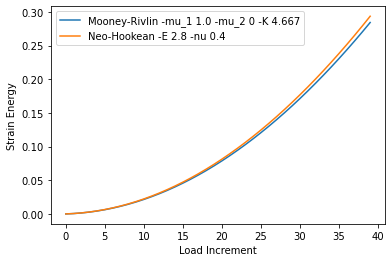

In [8]:
plt.plot(x_MR, y_MR[:-1], label = 'Mooney-Rivlin ' + '-mu_1 ' + str(data['-mu_1'][3]) + ' -mu_2 ' + str(data['-mu_2'][3]) + ' -K '+ str(data['-K'][3]))
plt.plot(x_NH, y_NH[:-1], label = 'Neo-Hookean ' + '-E ' + str(data['-E'][0]) + ' -nu ' + str(data['-nu'][0]))
plt.legend()
plt.xlabel('Load Increment')
plt.ylabel('Strain Energy')
plt.savefig('log_csv/20210603_strain_plot_MRvsNH.pdf', bbox_inches = 'tight')

In [3]:
#itertools testing

E = [0.5, 0.3, 0.2]
problem = ['FSInitial-NH1', 'FSInitial-MR1']
nu = [0.1, 0.2, 0.3]

print(list(itertools.product(E, problem, nu)))

[(0.5, 'FSInitial-NH1', 0.1), (0.5, 'FSInitial-NH1', 0.2), (0.5, 'FSInitial-NH1', 0.3), (0.5, 'FSInitial-MR1', 0.1), (0.5, 'FSInitial-MR1', 0.2), (0.5, 'FSInitial-MR1', 0.3), (0.3, 'FSInitial-NH1', 0.1), (0.3, 'FSInitial-NH1', 0.2), (0.3, 'FSInitial-NH1', 0.3), (0.3, 'FSInitial-MR1', 0.1), (0.3, 'FSInitial-MR1', 0.2), (0.3, 'FSInitial-MR1', 0.3), (0.2, 'FSInitial-NH1', 0.1), (0.2, 'FSInitial-NH1', 0.2), (0.2, 'FSInitial-NH1', 0.3), (0.2, 'FSInitial-MR1', 0.1), (0.2, 'FSInitial-MR1', 0.2), (0.2, 'FSInitial-MR1', 0.3)]
